<a href="https://colab.research.google.com/github/youngmoo/ECES-434/blob/main/Class%202.1%20(2021-01-20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ECES-434: Class 2.1 (2021-01-20)**
Welcome to Week 2 of Applied DSP!

Let's start by importing the "usual" modules we'll be using...

In [2]:
import numpy as np                # Load the NumPy module, using the abbreviation 'np'.
import matplotlib.pyplot as plt   # Load the Matplotlib module, abbreviated as 'plt'
import IPython.display as ipd     # Load the Interactive Python display module, abbreviated as 'ipd'
import librosa                    # Load the 'librosa' module for working with sound files and more

# Define a variable that's the directory path to our shared Google Drive folder
ClassPath = '/content/drive/MyDrive/ECES-434 Sessions/Class 2-1/'

In [3]:
# ENTER YOUR USERNAME
username = 'anonymous'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Let's load up a song...

In [12]:
file = ClassPath + 'YCAGWYW.wav'
[ycagwyw, fs] = librosa.load(file,sr=None)
print('sampling rate:')
print(fs)
#print('sampling rate: %d' % fs)
ipd.Audio(ycagwyw,rate=fs)

sampling rate:
44100


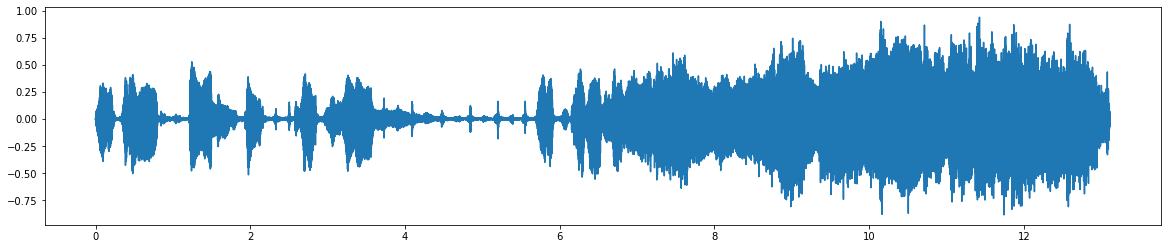

In [20]:
t_long = np.arange(len(ycagwyw)) / fs

fig = plt.figure(figsize=(20,4))
plt.plot(t_long, ycagwyw)
#plt.xlim(2,2.11)
#plt.ylim(-0.5, 0.5)

plt.show()

##Take a very short snippet (20 ms) of audio...

In [23]:
0.02

882.0

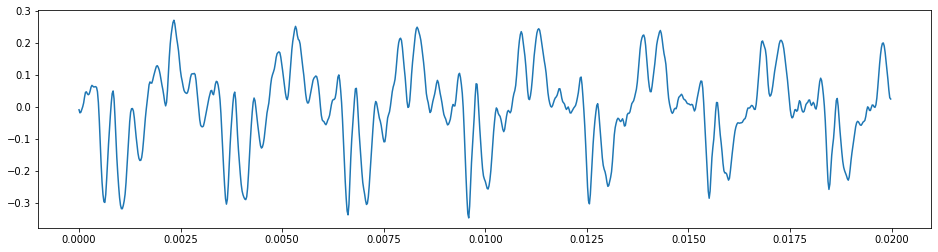

In [26]:
fSize = 44100 * 0.02
#fSize = int(44100 * 0.02)   # We want to use this as an array index, so we cast it to int (otherwise you get an error)

t = np.arange(fSize) / fs
x = ycagwyw[2*fs + 20:2*fs + fSize + 20]

fig = plt.figure(figsize=(16,4))
plt.plot(t, x)
plt.show()
ipd.Audio(x,rate=fs)

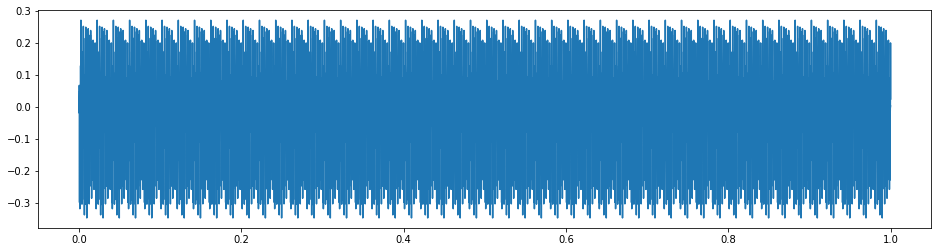

In [ ]:
x_rep = np.tile(x,50)
plt.figure(figsize=(16,4))
plt.plot(np.arange(len(x_rep))/fs, x_rep)
plt.show()

ipd.Audio(x_rep,rate=fs)

In [27]:
T0 = fSize/fs   # Should be 20 ms
print(T0)
f0 = 1/T0
f0

0.02


50.0

# A literal implementation of the Fourier Transform

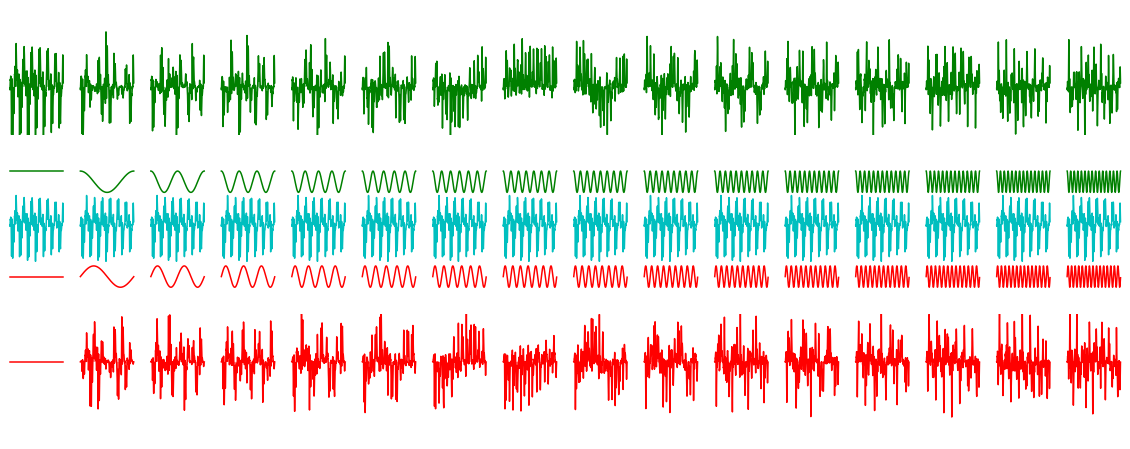

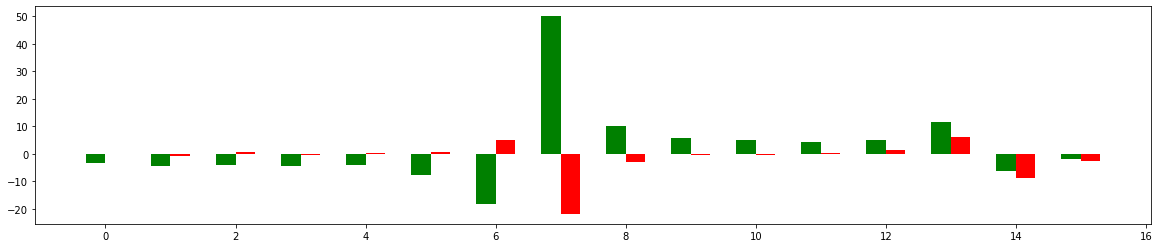

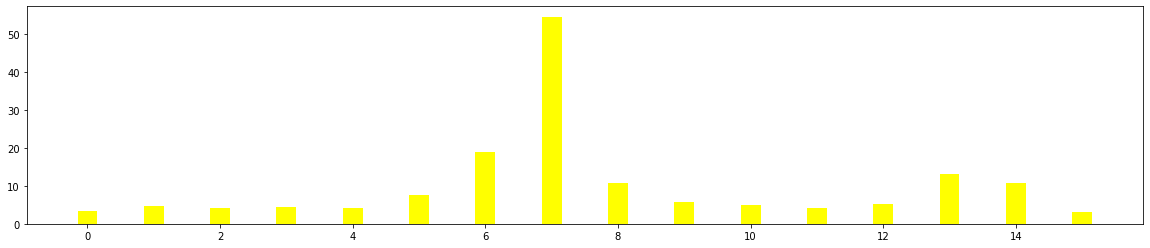

array([ 3.35946655,  4.59315855,  4.12052622,  4.36910697,  4.21611111,
        7.71931794, 19.01634765, 54.61933922, 10.72269564,  5.62436275,
        5.08485414,  4.26401896,  5.31169103, 13.20575891, 10.82467403,
        3.22054469])

In [35]:
K = 16            # Number of Fourier frequencies to compute

a = np.zeros(K)   # array for cos() weights
b = np.zeros(K)   # array for sin() weights
c = np.zeros(K)   # array for magnitude weights: sqrt(a**2 + b**2)

fig = plt.figure(figsize = (20, 8))
#plt.subplots_adjust(bottom=0.0,top=1.0,hspace=0.0)
y_lim = 0.4;

for k in range(K):
  f_k = f0*k 
  sin_k = np.sin(2*np.pi*f_k*t)
  cos_k = np.cos(2*np.pi*f_k*t)

  a[k] = np.sum(x*cos_k)
  b[k] = np.sum(x*sin_k)
  c[k] = np.sqrt(a[k]**2 + b[k]**2)

  # Everything else in the loop is to make nice looking plots
  plt.subplot(3,K,k+1)      # Subplots are indexed starting at 1, a la MATLAB ?!?!?
  plt.plot(t,x*cos_k-0.1,'g')
  plt.fill_between(t,x*cos_k-0.1,-0.1,facecolor='g',alpha=0.5)
  plt.ylim(-y_lim,y_lim)
  plt.axis('off')
   
  plt.subplot(3,K,K + k+1)
  plt.plot(t,x,'c',t,0.1*cos_k+0.4 ,'g',t,0.1*sin_k-0.49,'r')
  plt.ylim(-0.6,0.6)
  plt.axis('off')

  plt.subplot(3,K,2*K + k+1)
  plt.plot(t,x*sin_k+0.1,'r')
  plt.fill_between(t,x*sin_k+0.1,0.1,facecolor='r',alpha=0.5)
  plt.ylim(-y_lim,y_lim)
  plt.axis('off')


plt.show()

# Plot the a and b arrays
fig1 = plt.figure(figsize=(20,4))
plt.bar(np.arange(K)-0.15,a,width=0.3,color='g')
plt.bar(np.arange(K)+0.15,b,width=0.3,color='r')
plt.show()

# Plot the c array
fig2 = plt.figure(figsize=(20,4))
plt.bar(np.arange(K),c,width=0.3,color='yellow')
plt.show()

# Ouput c
c

##The (Discrete) Fourier Transform is $X[k] = \sum_{n=0}^{N-1}x[n] e^\frac{-j 2 \pi f_k n}{N}$

Are you sure using $\sin[2\pi f_k n]$ and $\cos[2\pi f_k n]$ is the same as $e^{-j2\pi f_k n}$ ?

In [33]:
c2 = np.zeros(K)

for k in range(K):
  f_k = f0*k 
  c2[k] = sum( x*np.exp(-1j*2*np.pi*f_k*t) )

np.abs(c2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


array([ 3.35946655,  4.54338537,  4.069437  ,  4.35346046,  4.20158396,
        7.69643636, 18.37472753, 50.06667924, 10.32300725,  5.60940318,
        5.07866679,  4.25791524,  5.12712982, 11.65235544,  6.23778839,
        2.00513642])

##But isn't there an easier way to compute the Fourier transform?
Yes, the Fast Fourier Transform (FFT) is a *much* more efficient algorithm for computing the (Discrete) Fourier Transform (DFT). Lots of people say 'FFT' when they actually mean 'DFT'.

In [37]:
X = np.fft.fft(x)     # FFT: 'Fast Fourier Transform'
np.abs(X[:16])

array([ 3.35946655,  4.59315855,  4.12052622,  4.36910697,  4.21611111,
        7.71931794, 19.01634765, 54.61933922, 10.72269564,  5.62436275,
        5.08485414,  4.26401896,  5.31169103, 13.20575891, 10.82467403,
        3.22054469])

##What does the full DFT look like?
Or at least, the magnitude DFT?

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


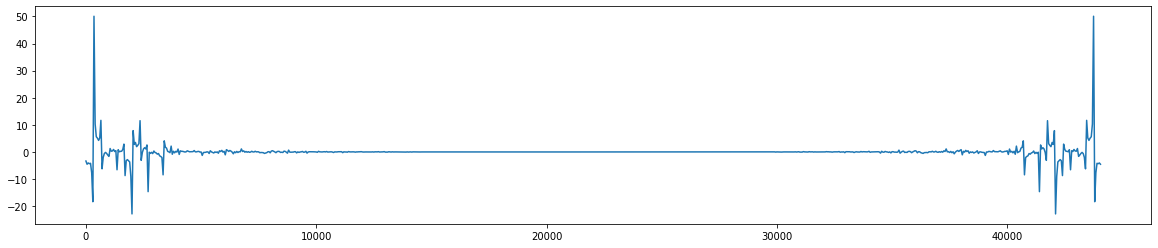

In [38]:
N = len(x)
fig = plt.figure(figsize=(20,4))
f = np.arange(N)*fs/N             # Frequency array, corresponding to Fourier frequencies (spaced at 50 Hz)

plt.plot(f, X)
#plt.plot(f, np.abs(X))
#plt.plot(f, 20*np.log10(np.abs(X)))

#plt.xlim(0,fs/2)

#What was that about zero-padding?
What happens as you try different amounts of zero-padding?

(0.0, 10000.0)

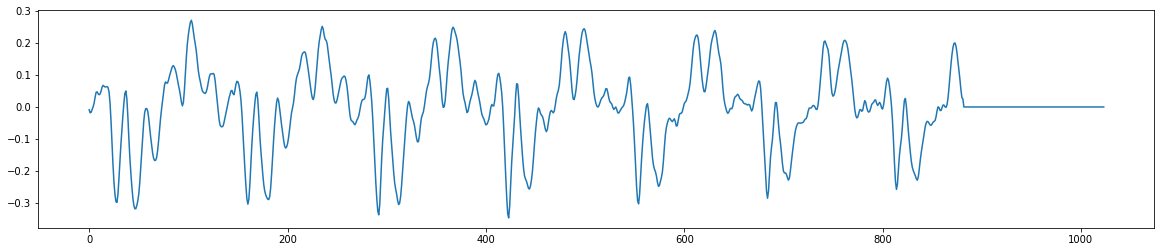

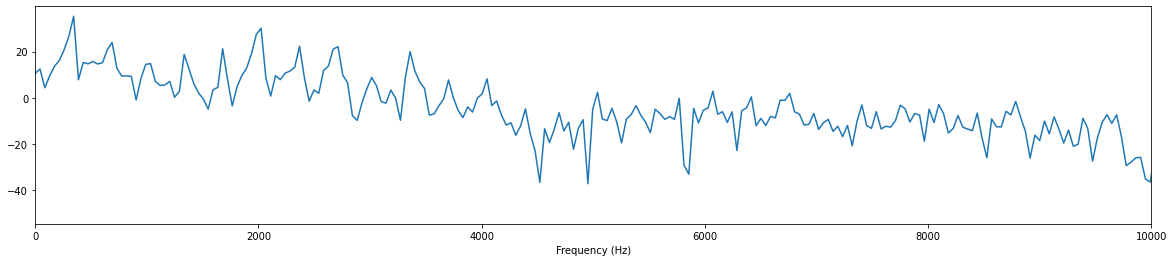

In [43]:
N_z = 1024
x_z = np.append(x, np.zeros(N_z - N)) # Zero-padded signal
f_z = np.arange(N_z) * fs / N_z       # Frequency vector (extended to zero-padded length)

X_z = np.fft.fft(x_z)                 # Fourier transform of zero-padded signal


fig1 = plt.figure(figsize=(20,4))
plt.plot(x_z)

fig2 = plt.figure(figsize=(20,4))
plt.plot(f_z, 20*np.log10(np.abs(X_z)))
plt.xlabel('Frequency (Hz)')
#plt.xlim(0,fs/2)
plt.xlim(0,10000)

## Periodic extension of a zero-padded frame

In [47]:
xz_rep = np.tile(x_z,15)
#librosa.output.write_wav('signal zero padded-periodic extension.wav', xz_rep, fs)

ipd.Audio(xz_rep,rate=fs)


##Windows

(0.0, 10000.0)

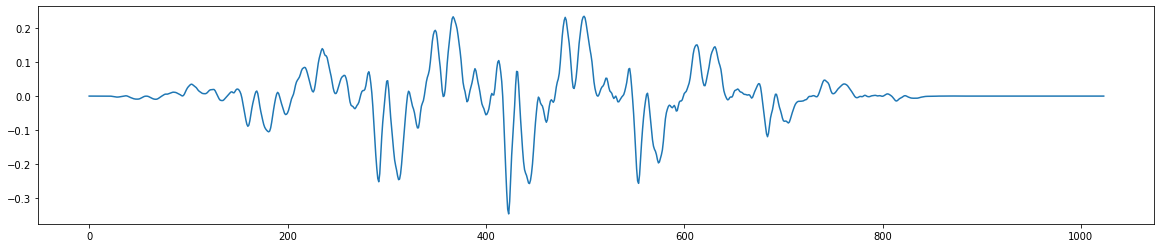

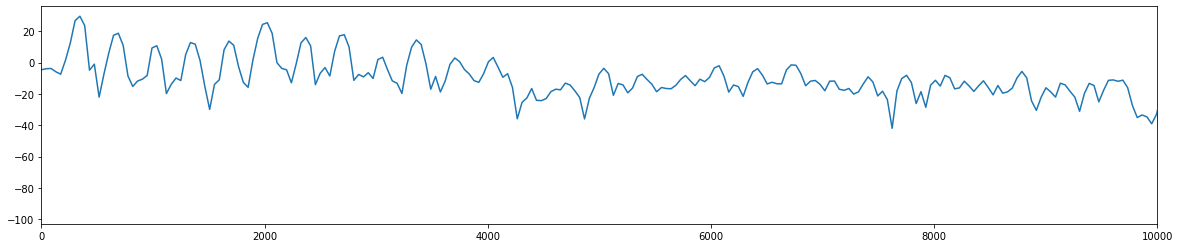

In [48]:
x_w = x[:N] * np.hanning(N)       # Actually a 'Hann' function
#x_w = x[:N] * np.bartlett(N)     # Fancy name for a triangle
#x_w = x[:N] * np.hamming(N)      # Another sinusoidal window
#x_w = x[:N] * np.blackman(N)     # Another window with different tradeoffs

x_wz = x_z
x_wz[:N] = x_w

X_wz = np.fft.fft(x_wz)

fig1 = plt.figure(figsize=(20,4))
plt.plot(x_wz)

fig2 = plt.figure(figsize=(20,4))
#plt.plot(f, np.abs(X))
plt.plot(f_z, 20*np.log10(np.abs(X_wz)))

#plt.xlim(0,fs/2)
plt.xlim(0,10000)



# Fourier Series to Transform

(0.0, 5000.0)

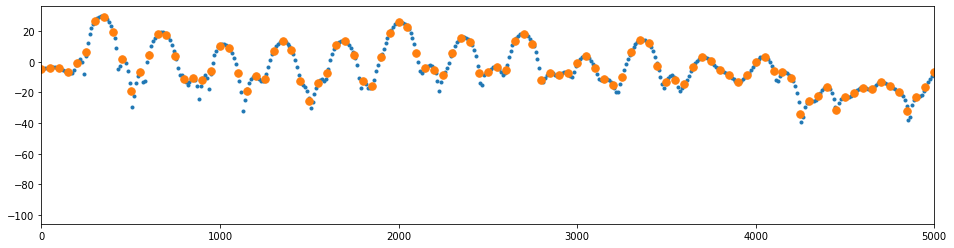

In [52]:
N_fft = 4096
X_w = np.fft.fft(x_w)
X_wz = np.fft.fft(x_w, n=N_fft)

fig = plt.figure(figsize=(16,4))
#ax = plt.axes(xlim=(-20,5020), ylim=(0, 90))

plt.plot(np.arange(N_fft)*fs/N_fft, 20*np.log10(np.abs(X_wz)),'.')
plt.plot(np.arange(N)*fs/N,20*np.log10(np.abs(X_w)),'.',markersize=15)
plt.xlim(0,5000)

#fig.savefig(path + 'Fourier Transform-windowed.png', dpi=200, transparent=True)

#Fourier Transform of a long signal

Text(0.5, 0, 'Frequency (Hz)')

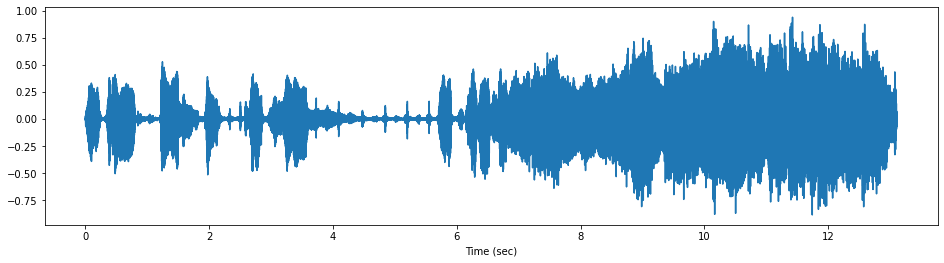

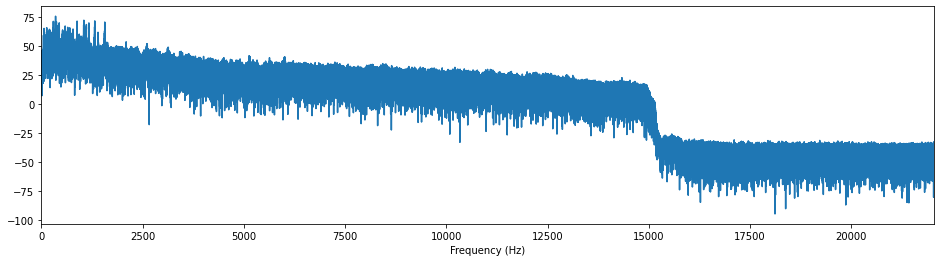

In [53]:
YCAGWYW = np.fft.fft(ycagwyw)
N_ycagwyw = len(YCAGWYW)

fig1 = plt.figure(figsize=(16,4))
t_ycagwyw = np.arange(N_ycagwyw)/fs    # Time sample locations for signal
plt.plot(t_ycagwyw,ycagwyw)
plt.xlabel('Time (sec)')

fig2 = plt.figure(figsize=(16,4))
plt.plot(np.arange(N_ycagwyw)*fs/N_ycagwyw,20*np.log10(np.abs(YCAGWYW)))
plt.xlim(0, fs/2)
plt.xlabel('Frequency (Hz)')


#Let's make a (FFT) movie!

In [54]:
# More modules required for animation
from matplotlib import animation, rc
from IPython.display import HTML

n_o = 0
f_size = int(fs*0.02)
n_hop = f_size / 2
N_fft = 4096
f = np.arange(N_fft) * fs / N_fft

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(14,6))
ax = plt.axes(xlim=(0,5000),ylim=(-100,100))
plt.close()   # Don't output the final figure separately

line, = ax.plot([], [])

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially  
def animate(i):
    n1 = int(n_o + n_hop*i)
    n2 = int(n_o + n_hop*i + f_size)

    x_i = ycagwyw[n1:n2]
    X_i = np.fft.fft(x_i * np.hanning(len(x_i)), n=N_fft)
    X_mag = 20*np.log(np.abs(X_i))

    line.set_data(f, X_mag)
    return (line,)  

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=50, interval=20, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim

# Spectrogram!

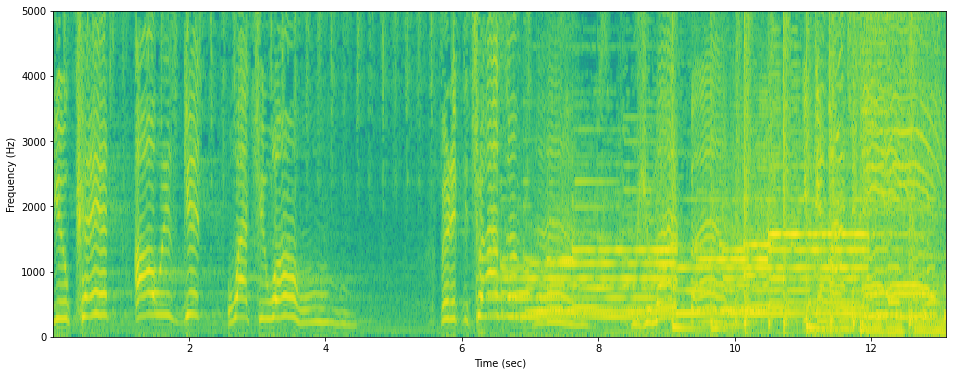

In [ ]:
from scipy import signal

f1, t1, Sxx = signal.spectrogram(ycagwyw, fs, window='bartlett', nperseg=882, noverlap=441, nfft=1024)
#f1, t1, Sxx = signal.spectrogram(ycagwyw, fs, window='hann', nperseg=882, noverlap=441, nfft=1024)

fig = plt.figure(figsize=(16,6))
#ax = plt.axes(xlim=(0,13),ylim=(0,5000))

plt.pcolormesh(t1, f1, 20*np.log10(np.abs(Sxx))) #, shading='gouraud')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')

#plt.xlim(0,4)
plt.ylim(0,5000)

#fig.savefig(ClassPath + username + '-Spectrogram-YCAGWYW.png', dpi=200)
plt.show()
ipd.Audio(ycagwyw,rate=fs)

#Another song...

#Make your own spectrogram
You can use the file below, or use your own. Take note of the parameters you use to create the spectrogram. Save your file to the class folder!

In [ ]:
file = ClassPath + 'FMTTM.wav'
[fmttm, fs] = librosa.load(file,sr=None)
ipd.Audio(fmttm,rate=fs)

In [ ]:
# Sampling rate (fs) should still be 44100
# Use whatever parameters (window/length, zero-pad/FFT size, hop length) to best reveal something in the audio
# Set axis appropriately


#fig.savefig(ClassPath + username + '-Spectrogram-2.png', dpi=200)